In [13]:
EXCEL_PATH = '/orcd/data/satra/002/datasets/SAILS/SFARI_Database/Duplicate Videos/VideoPreprocessing/VideoDates_20250918.xlsx'


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.width", 160)

In [14]:
df = pd.read_excel(EXCEL_PATH, engine='openpyxl')

In [15]:
print(f"Total Annotations: {len(df)}")
print("Attributes per Annotation:")
og_cols = df.columns
for col in og_cols:
    print(" -", col)

Total Annotations: 3624
Attributes per Annotation:
 - Source File
 - File Name
 - ID
 - Duration
 - Age At Video
 - Video Date
 - Date Validity Score


In [16]:
overview = pd.DataFrame({'type': df.dtypes.astype(str), 'missing': df.isna().sum(), 'unique': df.nunique()})
overview

,type,missing,unique
Source File,object,0,3624
File Name,object,0,3579
ID,object,0,151
Duration,float64,8,3409
Age At Video,float64,342,661
Video Date,datetime64[ns],342,1673
Date Validity Score,int64,0,4


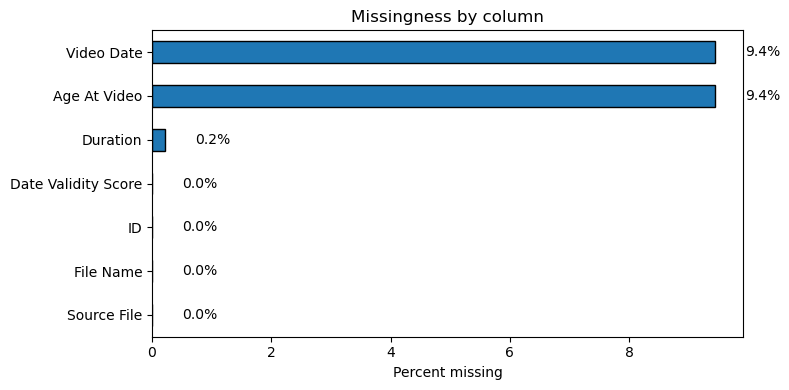

In [17]:
cols_to_check = ['Source File', 'File Name', 'ID', 'Duration', 'Age At Video', 'Video Date', 'Date Validity Score']
miss_pct = df[cols_to_check].isna().mean() * 100
plt.figure(figsize=(8,4))
ax = miss_pct.sort_values().plot(kind='barh', color='C0', edgecolor='black')
ax.set_xlabel('Percent missing')
ax.set_title('Missingness by column')
for i, v in enumerate(miss_pct.sort_values()):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')
plt.tight_layout()
plt.show()

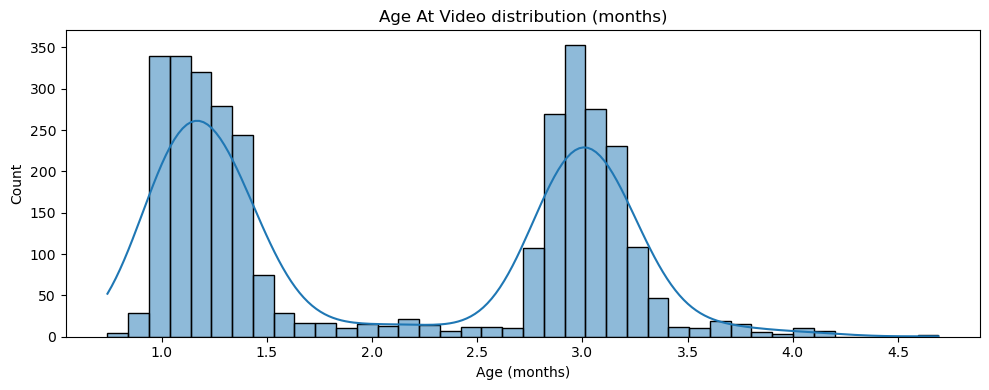

count    3282.000000
mean        2.071447
std         0.938229
min         0.742000
25%         1.169100
50%         1.551000
75%         3.000700
max         4.692700
Name: Age At Video, dtype: float64


In [20]:
s = df['Age At Video'].dropna()
if not s.empty:
    plt.figure(figsize=(10,4))
    sns.histplot(s, bins=40, kde=True)
    plt.title('Age At Video distribution (months)')
    plt.xlabel('Age (months)')
    plt.tight_layout()
    plt.show()
    print(s.describe())

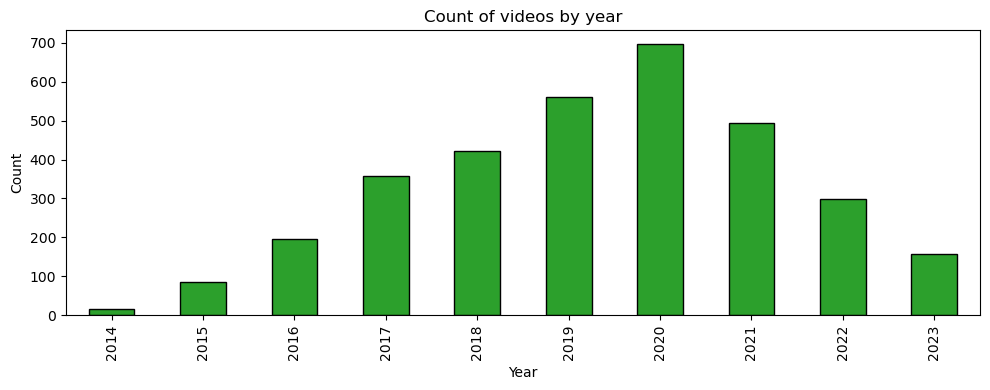

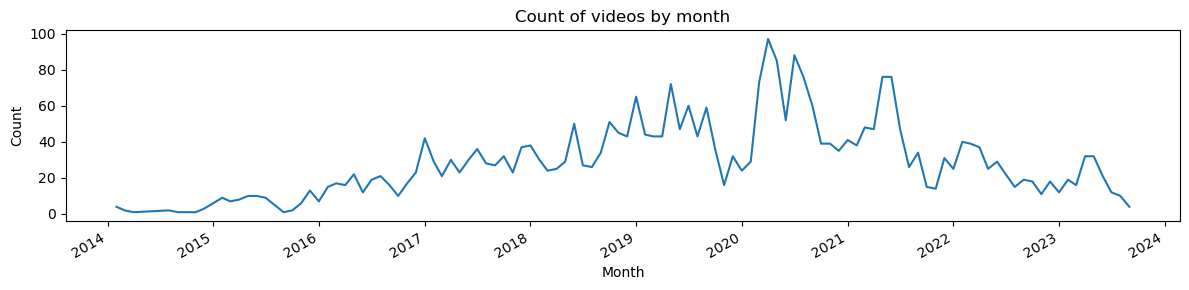

In [22]:

df['Video Date'] = pd.to_datetime(df['Video Date'], errors='coerce')
tmp = df.dropna(subset=['Video Date']).copy()
if not tmp.empty:
    tmp['year'] = tmp['Video Date'].dt.year
    yearly = tmp['year'].value_counts().sort_index()
    plt.figure(figsize=(10,4))
    yearly.plot(kind='bar', color='C2', edgecolor='black')
    plt.title('Count of videos by year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    monthly = tmp.groupby(tmp['Video Date'].dt.to_period('M')).size()
    monthly.index = monthly.index.to_timestamp()
    plt.figure(figsize=(12,3))
    monthly.plot()
    plt.title('Count of videos by month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print('Video Date present but no parsable dates')

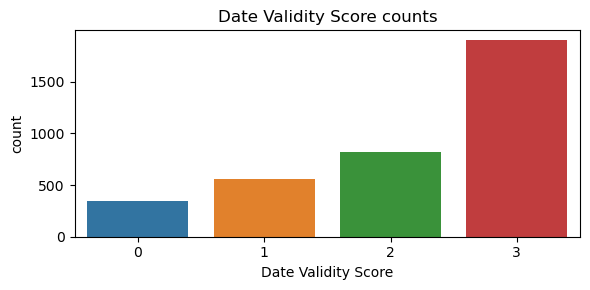

In [28]:
plt.figure(figsize=(6,3))
sns.countplot(x='Date Validity Score', data=df, order=sorted(df['Date Validity Score'].dropna().unique()))
plt.title('Date Validity Score counts')
plt.tight_layout()
plt.show()

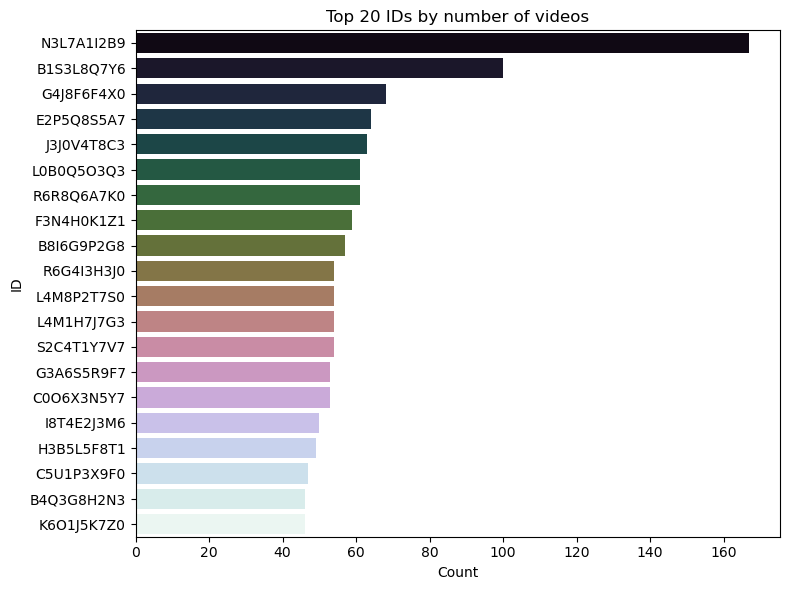

In [26]:
top = df['ID'].value_counts().head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=top.values, y=top.index, palette='cubehelix')
plt.title('Top 20 IDs by number of videos')
plt.xlabel('Count')
plt.ylabel('ID')
plt.tight_layout()
plt.show()

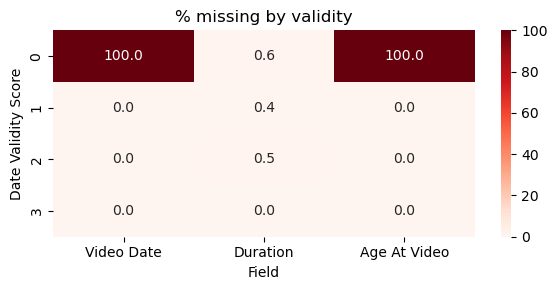

In [31]:
cols = ['Video Date','Duration','Age At Video']  # adjust as needed
miss = df[cols + ['Date Validity Score']].isna()
miss_by_valid = miss.groupby(df['Date Validity Score']).mean().loc[:, cols] * 100
plt.figure(figsize=(6,3))
sns.heatmap(miss_by_valid, annot=True, fmt='.1f', cmap='Reds')
plt.xlabel('Field')
plt.ylabel('Date Validity Score')
plt.title('% missing by validity')
plt.tight_layout()
plt.show()

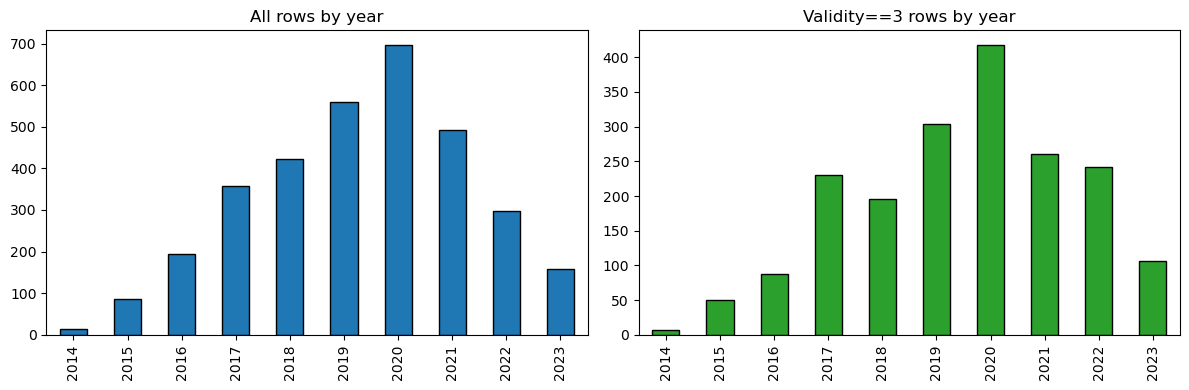

In [33]:
dfp = df.dropna(subset=['Video Date']).assign(year=lambda d: d['Video Date'].dt.year)
fig, ax = plt.subplots(1,2, figsize=(12,4))
dfp['year'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='C0', edgecolor='k')
ax[0].set_title('All rows by year')
dfp[dfp['Date Validity Score']==3]['year'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='C2', edgecolor='k')
ax[1].set_title('Validity==3 rows by year')
plt.tight_layout()
plt.show()